Для выполнения домашнего задания необходимо 
взять boston house-prices datase (sklearn.datasets.load_boston) 
и сделать тоже самое для задачи регрессии 
(попробовать разные алгоритмы, поподбирать параметры, вывести итоговое качество). 

In [2]:
import numpy as np
import pandas as pd

In [3]:
import seaborn as sns

In [4]:
from sklearn.datasets import load_boston
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
import matplotlib.pyplot as plt
%matplotlib inline

In [5]:
#sklearn.datasets.load_boston
boston=load_boston()



In [5]:
load_boston?

In [6]:
boston

{'data': array([[6.3200e-03, 1.8000e+01, 2.3100e+00, ..., 1.5300e+01, 3.9690e+02,
         4.9800e+00],
        [2.7310e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9690e+02,
         9.1400e+00],
        [2.7290e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9283e+02,
         4.0300e+00],
        ...,
        [6.0760e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
         5.6400e+00],
        [1.0959e-01, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9345e+02,
         6.4800e+00],
        [4.7410e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
         7.8800e+00]]),
 'target': array([24. , 21.6, 34.7, 33.4, 36.2, 28.7, 22.9, 27.1, 16.5, 18.9, 15. ,
        18.9, 21.7, 20.4, 18.2, 19.9, 23.1, 17.5, 20.2, 18.2, 13.6, 19.6,
        15.2, 14.5, 15.6, 13.9, 16.6, 14.8, 18.4, 21. , 12.7, 14.5, 13.2,
        13.1, 13.5, 18.9, 20. , 21. , 24.7, 30.8, 34.9, 26.6, 25.3, 24.7,
        21.2, 19.3, 20. , 16.6, 14.4, 19.4, 19.7, 20.5, 25. , 23.4, 18.9,
        35.4, 24.7, 3

In [7]:
X = boston.data
y = boston.target
feature_names=boston.feature_names

In [8]:
X=pd.DataFrame(X, columns=feature_names)

In [9]:
X.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [9]:
X.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.593761,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063
std,8.596783,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000
75%,3.647423,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000


In [10]:
print(y.min(), y.max(), y.mean(), y.std())

5.0 50.0 22.532806324110677 9.188011545278203


In [22]:
#for i in set(y):
#    print(i)
len(set(y))

229

In [10]:

from sklearn.model_selection import train_test_split
data_train, data_test, y_train, y_test = train_test_split(X, y, \
                                                        test_size=0.2, random_state=42)

In [23]:
len(set(y_train))

207

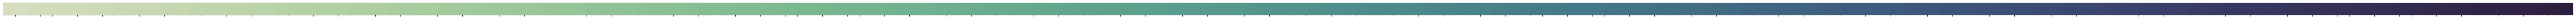

In [24]:
sns.palplot(sns.cubehelix_palette(len(set(y_train)), start=.5, rot=-.75))

In [11]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaler.fit(data_train)
MinMaxScaler(copy=True, feature_range=(0, 1))

data_train_sc=pd.DataFrame(scaler.transform(data_train) \
                           ,columns=data_train.columns \
                          )
data_test_sc=pd.DataFrame(scaler.transform(data_test),columns=data_test.columns)

In [12]:
data_train_sc['target']=y_train

<function matplotlib.pyplot.show(*args, **kw)>

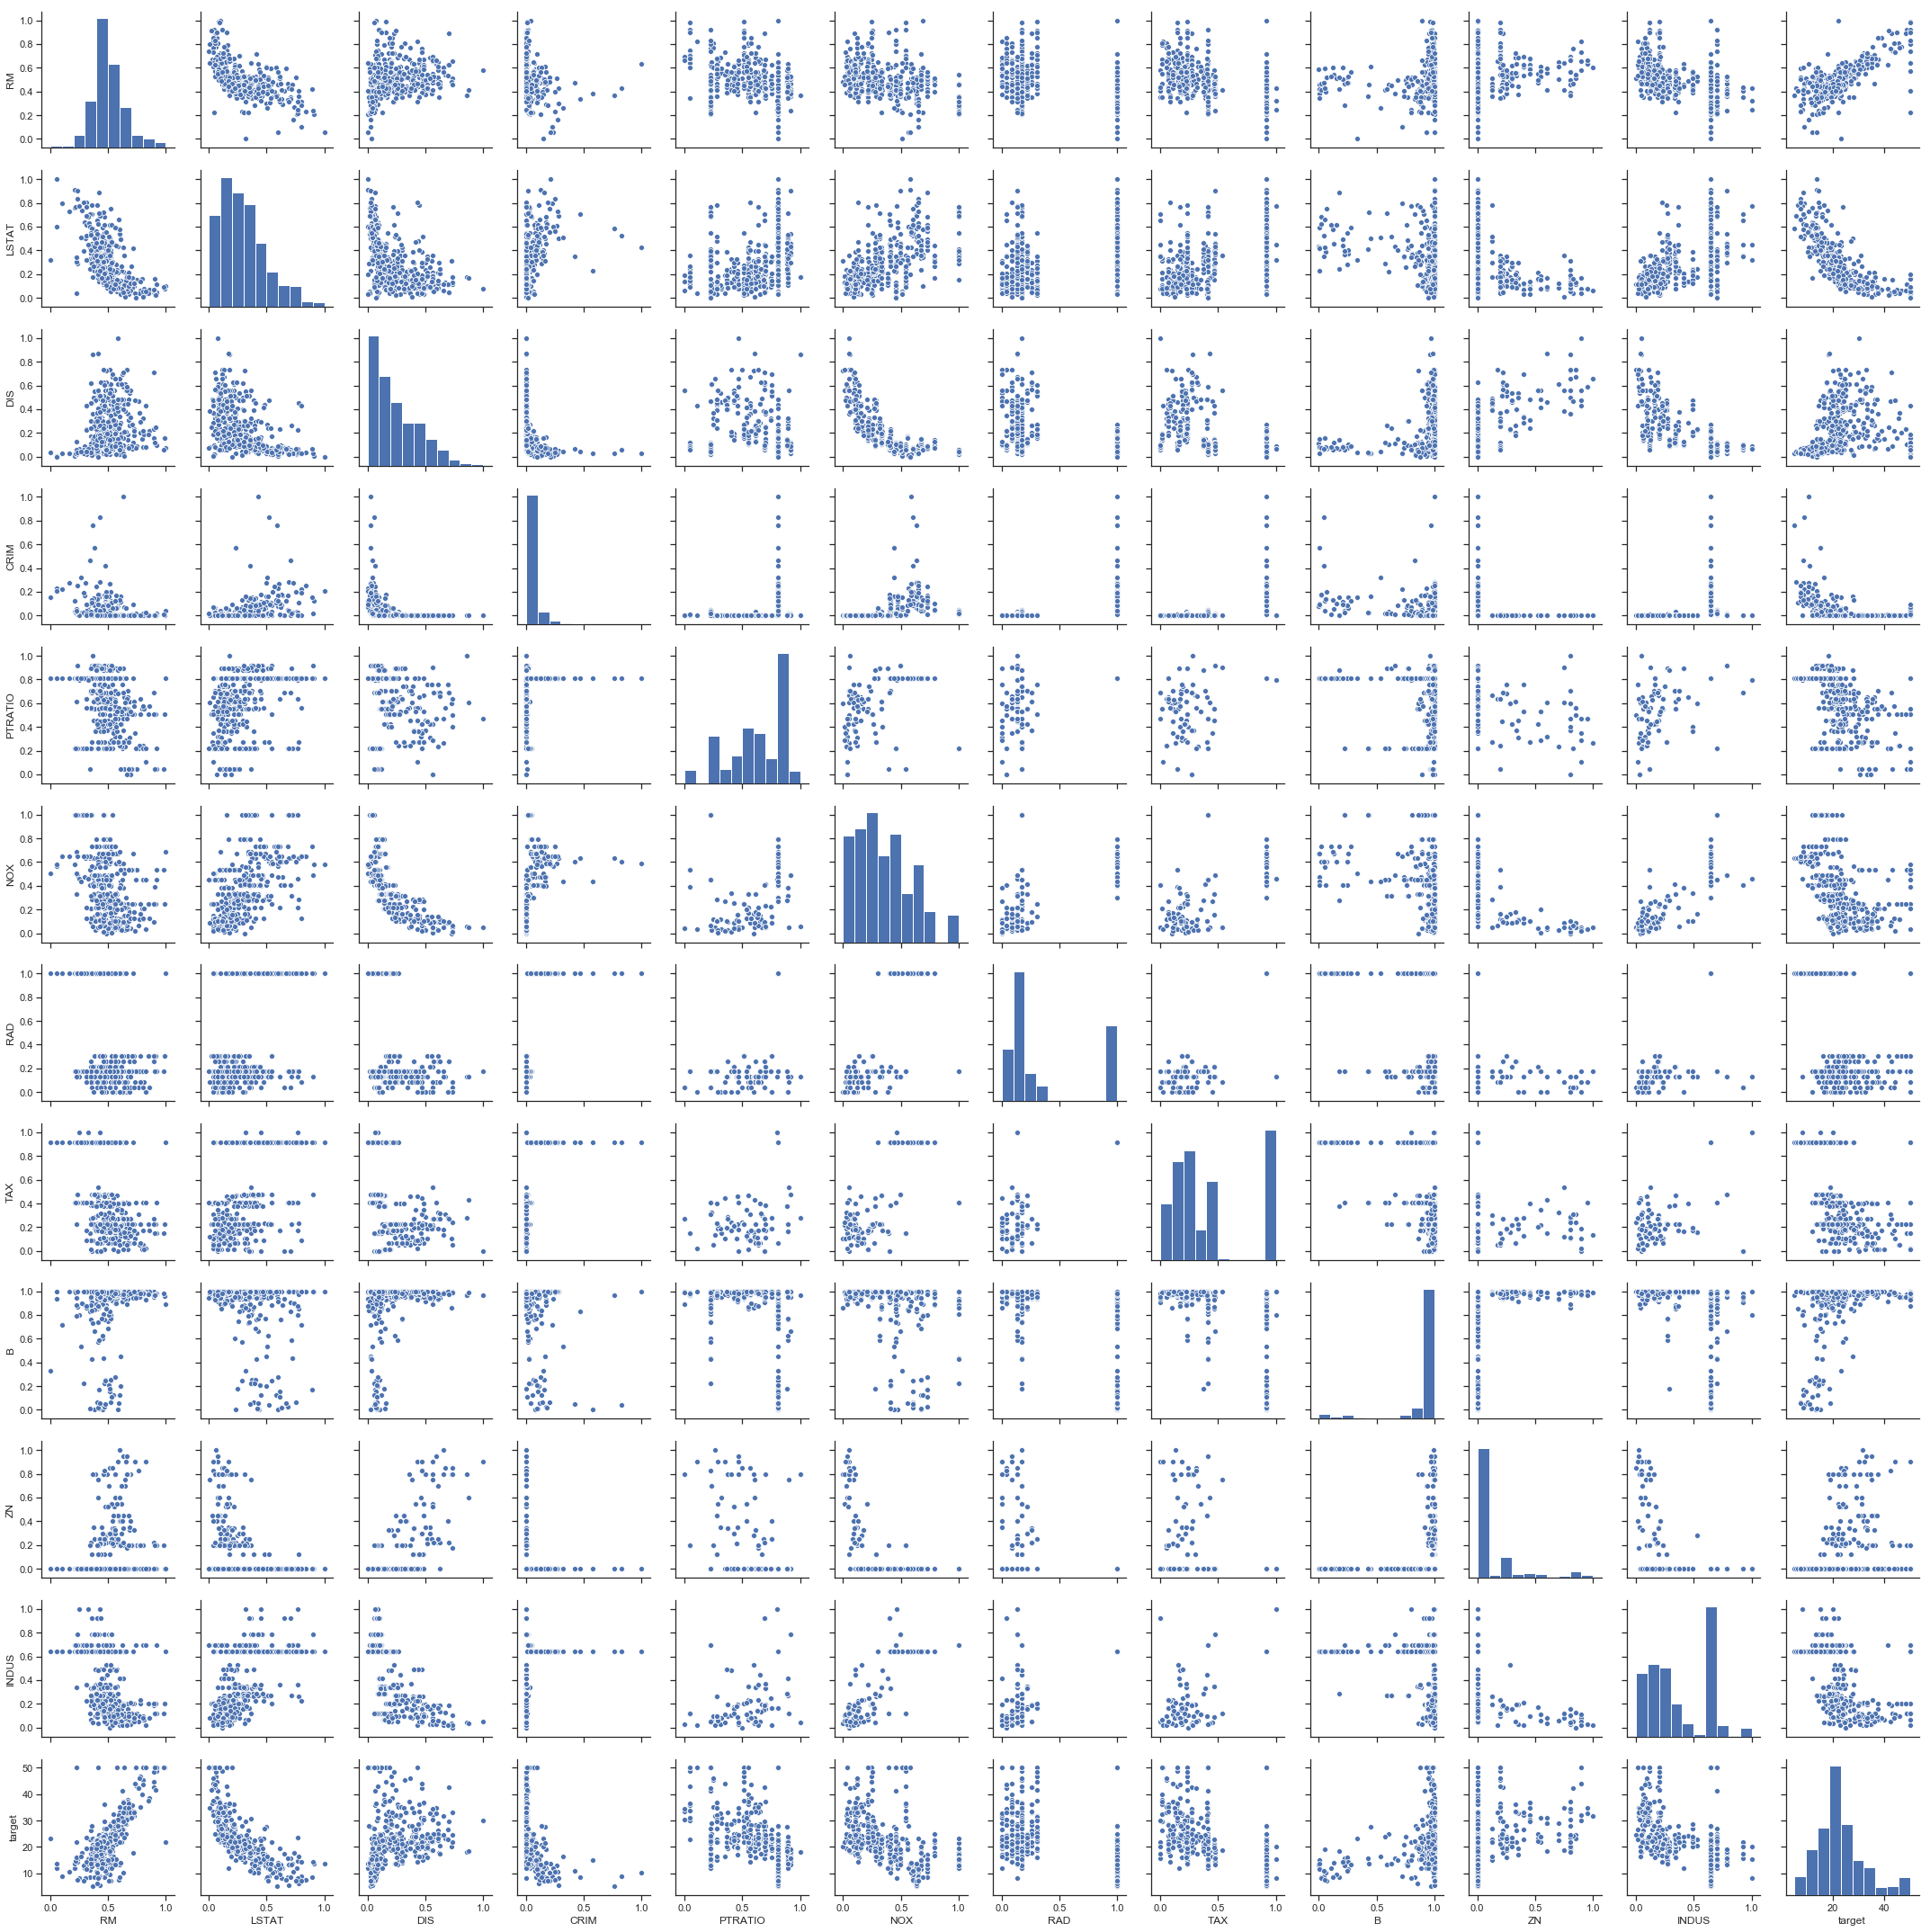

In [13]:
#data_train_sc.target=y_train
sns.set(style='ticks')
sns.pairplot(data_train_sc[['RM', 'LSTAT', 'DIS', 'CRIM', 'PTRATIO', \
                            'NOX','RAD',  'TAX', 'B', 'ZN', \
                            #'CHAS', 'AGE', \
                            'INDUS', 'target'
                               ]]
                 #, palette=('g', 'r'), hue='target'
            )
plt.show

<function matplotlib.pyplot.show(*args, **kw)>

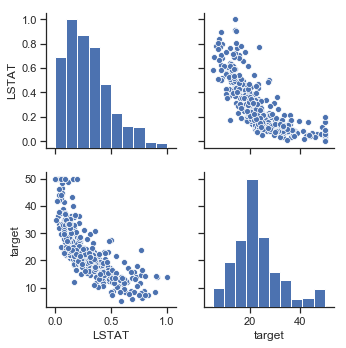

In [34]:
sns.set(style='ticks')
g = sns.pairplot(data_train_sc[[#'RM', 
                                'LSTAT', 'target'
                               ]]
                 #, palette=sns.color_palette("coolwarm", len(set(y_train))), hue='target'
            )
#g.fig.legend(handles=handles, labels=labels, loc='lower center', ncol=len(set(y_train)))
#g.legend().set_title('')
plt.show

Зависимость целевой переменной от LSTAT похожa на гиперболу. 
попробуем подобрать замену для lstat вида b+k/(lstat -x0)
так чтобы новая переменная была похожа на y

Text(0,0.5,'LSTAT')

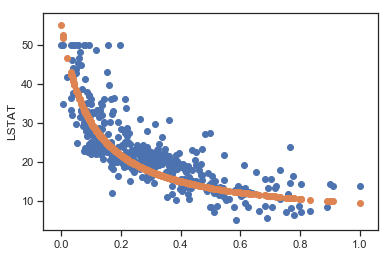

In [35]:
b=min(y_train)
#data_train_sc['LSTAT']
k=5
#x0=(0.01, 0.1, 0.2, 0.5)
x0=-0.1

plt.scatter(data_train_sc['LSTAT'], y_train)
plt.scatter(data_train_sc['LSTAT'], (b+k/(data_train_sc['LSTAT']-x0)))
plt.ylabel('LSTAT')


In [36]:
b=min(y_train)
k=5
x0=-0.1

#Minimize sum(  (y_train-(b+k/(lstat-x0))**2   ) 
#min=0
y_pred=(b+k/(data_train_sc['LSTAT']-x0))
min_sq=np.sqrt(sum((y_train-y_pred)**2)/len(y_train))
print(min_sq)

5.6685532369376554


In [37]:
#b=min(y_train)
#k=5
#x0=-0.1

alfa=0.0000002
min_sq_prev=min_sq
n=0
niter=10000
while min_sq_prev>=min_sq and n<niter:
    min_sq_prev=min_sq
    dydx0=-2*sum((y_train-y_pred)*k/(data_train_sc['LSTAT']-x0)**2)
    dydk=-1*sum(y_train-y_pred)
    x0-=alfa*dydx0
    k-=alfa*dydk*100
    y_pred=(b+k/(data_train_sc['LSTAT']-x0))
    min_sq=np.sqrt(sum((y_train-y_pred)**2)/len(y_train))
    #print(n, '   ,dy/dx0= ', dydx0, ',   dy/dk= ', dydk)
    if n % 1000==0:
        print(n, '   ,x0= ', x0, ',   k= ', k, ',   sq= ',min_sq)
        #print(n, '   ,dy/dx0= ', dydx0, ',   dy/dk= ', dydk)

    n+=1
    


#for x0i, kj in x0, k
#    new_lstat=b+k/(data_train_sc['LSTAT']+x0)
    

0    ,x0=  -0.0906411125766393 ,   k=  5.013749781020309 ,   sq=  5.649960379551039
1000    ,x0=  -0.14794420352412482 ,   k=  6.5663263859993 ,   sq=  5.332126768171067
2000    ,x0=  -0.14830843335651814 ,   k=  6.576136085791271 ,   sq=  5.332111399115983
3000    ,x0=  -0.14831155501240975 ,   k=  6.576220125635831 ,   sq=  5.332111337739141
4000    ,x0=  -0.1483115818099151 ,   k=  6.5762208470639045 ,   sq=  5.332111337217418


In [38]:
data_train_sc['LSTAT'].min()

0.0

In [39]:
data_train_sc['new_LSTAT']=(b+k/(data_train_sc['LSTAT']-x0))

In [40]:
data_test_sc['new_LSTAT']=(b+k/(data_test_sc['LSTAT']-x0))

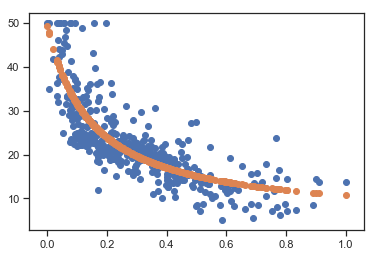

In [41]:
plt.scatter(data_train_sc['LSTAT'], y_train)
plt.scatter(data_train_sc['LSTAT'], data_train_sc['new_LSTAT'])

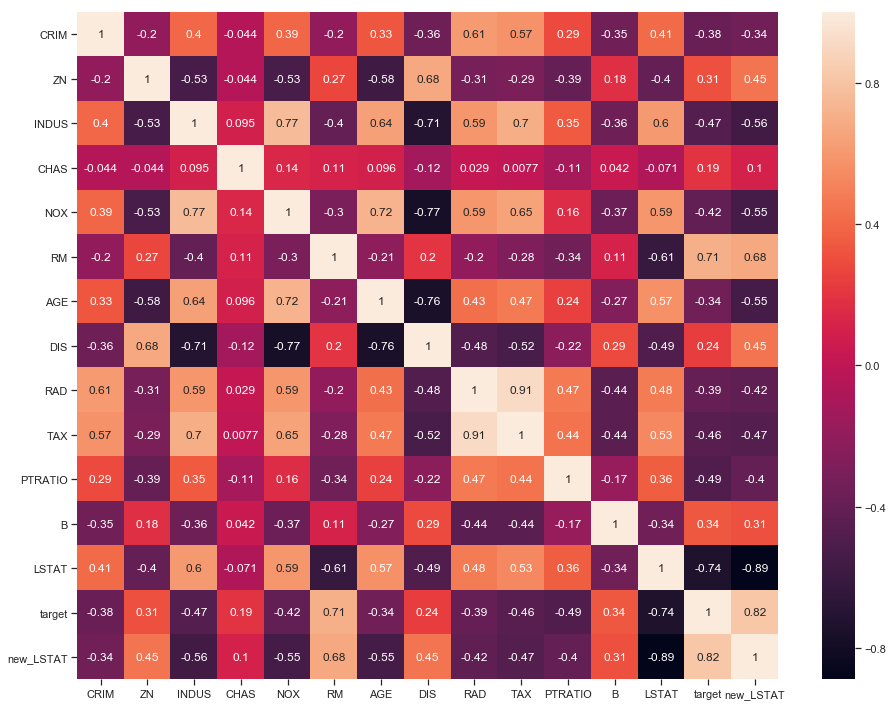

In [42]:
corr=data_train_sc.corr()

#import matplotlib.pyplot as plt
#import seaborn as sns

fig, ax = plt.subplots(figsize=(15.7, 12.27) )        # Sample figsize in inches

sns.heatmap(corr, annot=True,
            xticklabels=corr.columns.values,
            yticklabels=corr.columns.values)

In [43]:
data_train_sc.drop(columns=['target'], inplace=True)

In [44]:
data_train_sc.head(1)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,new_LSTAT
0,0.168763,0.0,0.642963,0.0,0.471193,0.293065,0.972194,0.088307,1.0,0.914122,0.808511,0.880428,0.639625,13.346133


In [45]:

from sklearn.linear_model import LinearRegression
reg = LinearRegression(fit_intercept=True).fit(data_train_sc, y_train)
print(reg.intercept_ )

6.012029324463249


In [46]:
#[0:14]
print(len(reg.coef_), len(data_train_sc.columns))

14 14


In [47]:
for i in sorted(zip(reg.coef_, data_train_sc.columns), key= lambda x: -abs(x[0])):
    print(i)

print(reg.score(data_train_sc, y_train),reg.score(data_test_sc, y_test) )

(13.730675664373212, 'RM')
(-13.584057662297512, 'DIS')
(-12.163395744507113, 'CRIM')
(-7.849768706240672, 'PTRATIO')
(-7.62999709997086, 'NOX')
(5.990306058584691, 'RAD')
(-5.216536407122924, 'TAX')
(4.101238209481439, 'B')
(2.1506428031958853, 'CHAS')
(1.5112348306027978, 'AGE')
(0.7082614658236956, 'new_LSTAT')
(0.5452212419997869, 'ZN')
(0.5122793531176242, 'LSTAT')
(-0.08940089036723567, 'INDUS')
0.8060766271944371 0.7539837125861841


In [48]:
predictors=['RM',
'DIS',
'CRIM',
'PTRATIO',
'NOX',
'RAD',
'TAX',
'B',
'CHAS',
'AGE',
'new_LSTAT',
'ZN',
'LSTAT',
'INDUS']

In [49]:
i=5
predictors[0:12]
#len(predictors)

['RM',
 'DIS',
 'CRIM',
 'PTRATIO',
 'NOX',
 'RAD',
 'TAX',
 'B',
 'CHAS',
 'AGE',
 'new_LSTAT',
 'ZN']

In [50]:
for j in (True, False):
    for i in range(1, len(predictors)):
        reg = LinearRegression(fit_intercept=j).fit(data_train_sc[predictors[0:i]], y_train)
        print('intes=',j, 'n_features=', i , \
              reg.score(data_train_sc[predictors[0:i]], y_train), \
              reg.score(data_test_sc[predictors[0:i]], y_test))
        

intes= True n_features= 1 0.5050658352776294 0.3707569232254778
intes= True n_features= 2 0.5143000548850905 0.3948060231325965
intes= True n_features= 3 0.5624876705772197 0.429636611799901
intes= True n_features= 4 0.6076477566397449 0.5122802761841165
intes= True n_features= 5 0.6522609143494685 0.5558488572038821
intes= True n_features= 6 0.6531739741088716 0.565815016404096
intes= True n_features= 7 0.6581355166148426 0.5876514656321034
intes= True n_features= 8 0.6791349804691478 0.5743020296984318
intes= True n_features= 9 0.6888577337436494 0.5667733186603363
intes= True n_features= 10 0.6963650634860399 0.5803629344386527
intes= True n_features= 11 0.8059649053845129 0.7523484183122577
intes= True n_features= 12 0.8060555872527497 0.7538350421723681
intes= True n_features= 13 0.8060750914970878 0.7539720294569745
intes= False n_features= 1 0.5050499560698152 0.3716095382610171
intes= False n_features= 2 0.5139277488523364 0.3981637806094711
intes= False n_features= 3 0.5588036

In [51]:
#На тесте лучшая регрессия со всеми 13 фичами и со свободным членом

In [52]:
reg = LinearRegression(fit_intercept=True).fit(data_train_sc, y_train)
y_pred=reg.predict(data_test_sc)

In [53]:
print('intes=',True, 'n_features=', 13 , \
              reg.score(data_train_sc, y_train), \
              reg.score(data_test_sc, y_test))

intes= True n_features= 13 0.8060766271944371 0.7539837125861841


In [54]:
col = ['model', 'R2_train', 'R2_test', 'model_std_test'] 

#ind = ['model_pow_%d' % i for i in range(1, 16)]
ind = [i for i in range(17)]
model_comparison = pd.DataFrame(index=ind, columns=col)

In [55]:
n=0

In [56]:
from sklearn.metrics import mean_squared_error, r2_score
 

In [57]:
np.sqrt(mean_squared_error(y_test, y_pred))

4.247505747507878

In [58]:
su=0
for i in zip(y_test, y_pred):
    #print(i)
    su+=(i[1]-i[0])**2
print(su, np.sqrt(su), np.sqrt(su/len(y_test)) )
print(np.std(y_test-y_pred))

1840.213117661471 42.89770527267713 4.247505747507878
4.243129201410983


In [59]:
model_comparison.iloc[n, : ]=['logreg_all_features_inters', \
                                reg.score(data_train_sc, y_train), \
              reg.score(data_test_sc, y_test),\
                               np.sqrt(mean_squared_error(y_test, y_pred))]
n+=1

In [60]:
model_comparison.head()

,model,R2_train,R2_test,model_std_test
0,logreg_all_features_inters,0.806077,0.753984,4.24751
1,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN


In [61]:
one_feature_regression=data_train_sc['new_LSTAT']

In [62]:
n=1
model_comparison.iloc[n, : ]=['logreg_1_feature', \
                                r2_score(y_train, data_train_sc['new_LSTAT']), \
              r2_score(y_test, data_test_sc['new_LSTAT']),\
                               np.sqrt(mean_squared_error(y_test, data_test_sc['new_LSTAT']))]
n+=1

In [63]:
model_comparison.head()

,model,R2_train,R2_test,model_std_test
0,logreg_all_features_inters,0.806077,0.753984,4.24751
1,logreg_1_feature,0.672726,0.679677,4.8467
2,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN


In [64]:
from sklearn.ensemble import RandomForestRegressor
rfr = RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=20,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=100, 
           oob_score=False, random_state=0, verbose=0, warm_start=False)
rfr.fit(data_train_sc, y_train)
print(rfr.feature_importances_)
#print(regr.predict([[0, 0, 0, 0]]))

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d


[0.0347198  0.0011884  0.00699331 0.00094916 0.01937432 0.50568643
 0.01485162 0.05369891 0.00353284 0.01652127 0.01644991 0.0117668
 0.11630424 0.197963  ]


In [65]:
for i in sorted(zip(rfr.feature_importances_, data_train_sc.columns), key= lambda x: -abs(x[0])):
    print(i)

(0.5056864286222527, 'RM')
(0.1979629973354639, 'new_LSTAT')
(0.11630424263805442, 'LSTAT')
(0.05369891012597233, 'DIS')
(0.034719800439177766, 'CRIM')
(0.01937432069826468, 'NOX')
(0.01652126596909955, 'TAX')
(0.016449906944087652, 'PTRATIO')
(0.014851620930759186, 'AGE')
(0.011766803763777473, 'B')
(0.006993310349244097, 'INDUS')
(0.0035328360429621505, 'RAD')
(0.0011884004134127678, 'ZN')
(0.0009491557274716187, 'CHAS')


In [66]:
y_pred_tr=rfr.predict(data_train_sc)
y_pred_te=rfr.predict(data_test_sc)

In [67]:
model_comparison.iloc[n, : ]=['random_forest', \
                                r2_score(y_train, y_pred_tr), \
              r2_score(y_test, y_pred_te),\
                               np.sqrt(mean_squared_error(y_test, y_pred_te))]
n+=1

In [68]:
model_comparison.head()

,model,R2_train,R2_test,model_std_test
0,logreg_all_features_inters,0.806077,0.753984,4.24751
1,logreg_1_feature,0.672726,0.679677,4.8467
2,random_forest,0.974819,0.876608,3.00813
3,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN


In [69]:
#bootstrap=True, criterion='mse', max_depth=20,
#           max_features='auto'

In [70]:
for i in range(2,50):
    rfr=RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=i,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=100, 
           oob_score=False, random_state=0, verbose=0, warm_start=False)
    rfr.fit(data_train_sc, y_train)
    y_pred_tr=rfr.predict(data_train_sc)
    y_pred_te=rfr.predict(data_test_sc)
    print(i, r2_score(y_train, y_pred_tr), \
              r2_score(y_test, y_pred_te),\
                               np.sqrt(mean_squared_error(y_test, y_pred_te)))

2 0.7625152543425386 0.7033586686941331 4.664100241887386
3 0.8666860239423462 0.8155270298946505 3.678056659249071
4 0.9074013303428783 0.8477491467235068 3.3414265007856305
5 0.9306769614242429 0.8585943409787 3.2202192373052143
6 0.9469031321354499 0.8704079146082031 3.08277113802113
7 0.9582436884836097 0.8722765644338291 3.060464462839106
8 0.9648960673385575 0.8744500843880401 3.0343121604878283
9 0.969459120988646 0.8724057674764282 3.0589161120225974
10 0.9720658674683166 0.8735389813096475 3.045302106995603
11 0.9729314791455373 0.8764292644250271 3.0103005709757062
12 0.9741351182221369 0.8733847996399178 3.0471579624310783
13 0.9742833562439416 0.8756638330133829 3.0196094960743327
14 0.9749318436392511 0.8726264240723156 3.0562699811102654
15 0.9749056968870353 0.8730239905773668 3.051496541299451
16 0.9745968844321004 0.8733504339848595 3.0475714612627747
17 0.9744427167570755 0.8758334585006714 3.0175490435250607
18 0.9749521704461155 0.8746320724906087 3.032112202942495


In [71]:
rfr = RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=22,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=100, 
           oob_score=False, random_state=0, verbose=0, warm_start=False)
rfr.fit(data_train_sc, y_train)
y_pred_tr=rfr.predict(data_train_sc)
y_pred_te=rfr.predict(data_test_sc)

In [72]:
model_comparison.iloc[n, : ]=['random_forest_depth_22', \
                                r2_score(y_train, y_pred_tr), \
              r2_score(y_test, y_pred_te),\
                               np.sqrt(mean_squared_error(y_test, y_pred_te))]
n+=1

In [73]:
model_comparison.head()

,model,R2_train,R2_test,model_std_test
0,logreg_all_features_inters,0.806077,0.753984,4.24751
1,logreg_1_feature,0.672726,0.679677,4.8467
2,random_forest,0.974819,0.876608,3.00813
3,random_forest_depth_22,0.974828,0.87676,3.00626
4,NaN,NaN,NaN,NaN


In [74]:

from sklearn.linear_model import Lasso

lassoreg = Lasso(alpha=1.0, max_iter=1e5)
lassoreg.fit(data_train_sc, y_train)

Lasso(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=100000.0,
   normalize=False, positive=False, precompute=False, random_state=None,
   selection='cyclic', tol=0.0001, warm_start=False)

In [76]:
print(lassoreg.score(data_train_sc, y_train),lassoreg.score(data_test_sc, y_test)) 

0.6725289341595553 0.6804618076657003


In [88]:
y_pred_tr=lassoreg.predict(data_train_sc)
y_pred_te=lassoreg.predict(data_test_sc)

In [90]:
n=4
model_comparison.iloc[n, : ]=['lasso_alpha_1', \
                                r2_score(y_train, y_pred_tr), \
              r2_score(y_test, y_pred_te),\
                               np.sqrt(mean_squared_error(y_test, y_pred_te))]
n+=1

In [91]:
from sklearn.model_selection import GridSearchCV
param_grid={'alpha': (0.001, 0.01, 0.1, 0.5, 1.0, 1.5, 2.0, 5.0) } #, 'max_depth' : range(2, 20)}
grid = GridSearchCV(lassoreg, param_grid, cv=10, scoring='r2', return_train_score=True)
grid.fit(data_train_sc, y_train)

GridSearchCV(cv=10, error_score='raise',
       estimator=Lasso(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=100000.0,
   normalize=False, positive=False, precompute=False, random_state=None,
   selection='cyclic', tol=0.0001, warm_start=False),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'alpha': (0.001, 0.01, 0.1, 0.5, 1.0, 1.5, 2.0, 5.0)},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring='r2', verbose=0)

In [92]:
print( grid.score(data_train_sc, y_train), grid.score(data_test_sc, y_test))

0.8050883423952759 0.7528015753593198


In [93]:
grid.best_score_

0.7630870577858038

In [94]:
grid.best_params_

{'alpha': 0.01}

In [95]:
y_pred_tr=grid.predict(data_train_sc)
y_pred_te=grid.predict(data_test_sc)

In [96]:
model_comparison.iloc[n, : ]=['lasso_alpha_001', \
                                r2_score(y_train, y_pred_tr), \
              r2_score(y_test, y_pred_te),\
                               np.sqrt(mean_squared_error(y_test, y_pred_te))]
n+=1

In [97]:
model_comparison.head(6)

,model,R2_train,R2_test,model_std_test
0,logreg_all_features_inters,0.806077,0.753984,4.24751
1,logreg_1_feature,0.672726,0.679677,4.8467
2,random_forest,0.974819,0.876608,3.00813
3,random_forest_depth_22,0.974828,0.87676,3.00626
4,lasso_alpha_1,0.672529,0.680462,4.84076
5,lasso_alpha_001,0.805088,0.752802,4.2577


In [ ]:
#Лес - лучше всех